1. library import

Drive already mounted at /lecture-2023ai; to attempt to forcibly remount, call drive.mount("/lecture-2023ai", force_remount=True).


Saving nbastat2022.csv to nbastat2022.csv
[[ -4.43052209]
 [-51.9837751 ]]
[[ -4.38031866]
 [-51.39304791]]
[[ -4.33068572]
 [-50.80903341]]
[[ -4.28161678]
 [-50.23165534]]
[[ -4.23310542]
 [-49.66083827]]
[[ -4.18514532]
 [-49.09650766]]
[[ -4.13773021]
 [-48.53858979]]
[[ -4.09085389]
 [-47.98701179]]
[[ -4.04451025]
 [-47.44170162]]
[[ -3.99869323]
 [-46.90258806]]
[[ -3.95339685]
 [-46.36960068]]
[[ -3.90861519]
 [-45.84266989]]
[[ -3.8643424 ]
 [-45.32172684]]
[[ -3.8205727 ]
 [-44.80670351]]
[[ -3.77730037]
 [-44.29753262]]
[[ -3.73451976]
 [-43.79414767]]
[[ -3.69222528]
 [-43.29648291]]
[[ -3.65041141]
 [-42.80447334]]
[[ -3.60907269]
 [-42.31805469]]
[[ -3.56820372]
 [-41.83716344]]
[[ -3.52779916]
 [-41.36173677]]
[[ -3.48785373]
 [-40.8917126 ]]
[[ -3.44836221]
 [-40.42702951]]
[[ -3.40931945]
 [-39.96762684]]
[[ -3.37072035]
 [-39.51344456]]
[[ -3.33255987]
 [-39.06442336]]
[[ -3.29483302]
 [-38.62050459]]
[[ -3.25753487]
 [-38.18163027]]
[[ -3.22066056]
 [-37.74774308]]
[

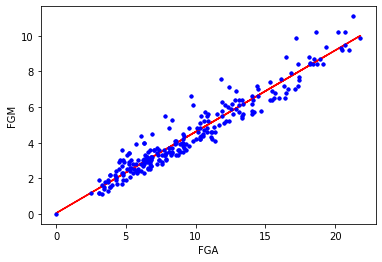

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/lecture-2023ai')

from google.colab import files
files.upload()

nbastat = pd.read_csv('nbastat2022.csv')
m = len(nbastat)

x = nbastat[['FGA']]  # 필드 슛 시도
y = nbastat[['FGM']]  # 슛 성공 개수

# 결측값 처리
x = x.fillna(0)
y = y.fillna(0)

# Numpy로 변환
x = (np.array(x)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)

# 그려보기
import matplotlib.pyplot as plt
plt.plot(x, y, '.b')
plt.xlabel('FGA')
plt.ylabel('FGM')


# 10. 준비
learning_rate = 0.0001
n_iter = 949

#np.zeros((a,b)) : a * b의 Zero Matrix 생성
theta = np.zeros((2, 1)) # 세타
gradients = np.zeros((2, 1)) #손실값

x0 = np.ones((m, 1)) #np.ones : 1로 가득 찬 array를 생성함
xb = np.c_[x0, x] #np.c_ : 배열을 합침 [[1, x1], [1, x2], ...]

# 훈련
#np.dot(x,y) : 행렬 X와 Y의 곱
#np.T : 전치행렬

min = gradients[:]
for i in range(n_iter):
  gradients = (1.0/m) * xb.T.dot(xb.dot(theta) - y)
  theta = theta - learning_rate * gradients

print('theta', theta)

# 결과
y_pred = xb.dot(theta)
plt.plot(x, y_pred, color='Red')
plt.plot(x, y, '.b')

xtest = np.array([1, 15])
result = np.dot(xtest, theta)
print(result)